# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    #Change temperature to celsius
    units = "metric"
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(city_weather["name"])
        city_lat.append(city_weather["coord"]["lat"])
        city_lng.append(city_weather["coord"]["lon"])
        city_max_temp.append(city_weather["main"]["temp_max"])
        city_humidity.append(city_weather["main"]["humidity"])
        city_clouds.append(city_weather["clouds"]["all"])
        city_wind.append(city_weather["wind"]["speed"])
        city_country.append(city_weather["sys"]["country"])
        city_date.append(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | egilsstadir
Processing Record 2 of Set 1 | mogocha
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | goz beida
Processing Record 9 of Set 1 | mapastepec
Processing Record 10 of Set 1 | carazinho
Processing Record 11 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 12 of Set 1 | coahuayana de hidalgo
Processing Record 13 of Set 1 | gulnar
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | richards bay
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | remire-montjoly
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | waitangi
Processin

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame({"City": city_name,
               "Lat": city_lat,
               "Lng": city_lng,
               "Max Temp": city_max_temp,
               "Humidity": city_humidity,
               "Cloudiness": city_clouds,
               "Wind Speed": city_wind,
               "Country": city_country,
               "Date": city_date})

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Egilsstadir,65.2653,-14.3948,-6.05,93,0,3.09,IS,1699669353
1,Mogocha,53.7333,119.7667,-9.64,47,76,1.48,RU,1699669353
2,Albany,42.6001,-73.9662,7.04,61,50,2.41,US,1699669353
3,Grytviken,-54.2811,-36.5092,2.00,85,53,5.77,GS,1699669353
4,Puerto Natales,-51.7236,-72.4875,4.78,96,100,2.82,CL,1699669353


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/Aline/anaconda3/CSV Files/WeatherPy/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/Aline/anaconda3/CSV Files/WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Egilsstadir,65.2653,-14.3948,-6.05,93,0,3.09,IS,1699669353
1,Mogocha,53.7333,119.7667,-9.64,47,76,1.48,RU,1699669353
2,Albany,42.6001,-73.9662,7.04,61,50,2.41,US,1699669353
3,Grytviken,-54.2811,-36.5092,2.00,85,53,5.77,GS,1699669353
4,Puerto Natales,-51.7236,-72.4875,4.78,96,100,2.82,CL,1699669353


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

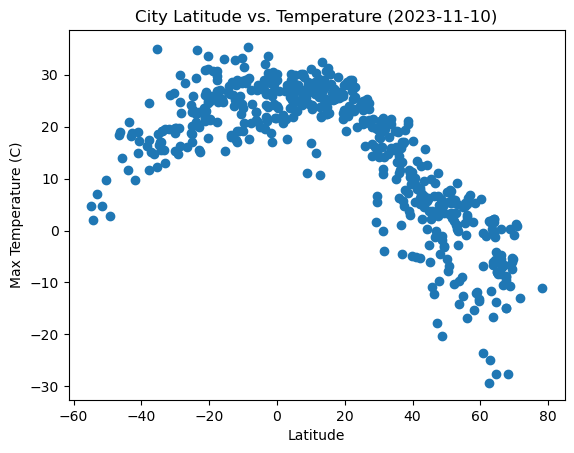

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_lat, city_max_temp)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("C:/Users/Aline/anaconda3/CSV Files/WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

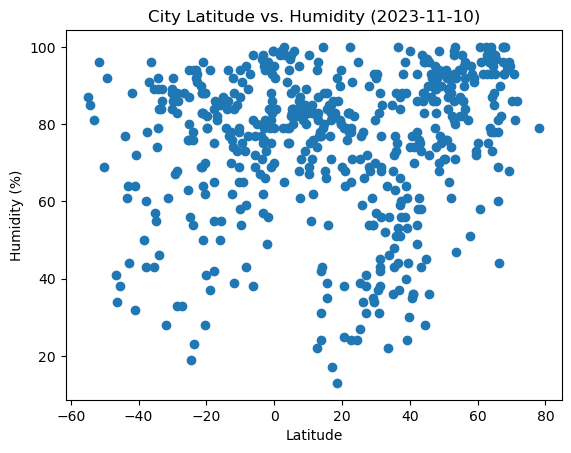

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_lat, city_humidity)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("C:/Users/Aline/anaconda3/CSV Files/WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

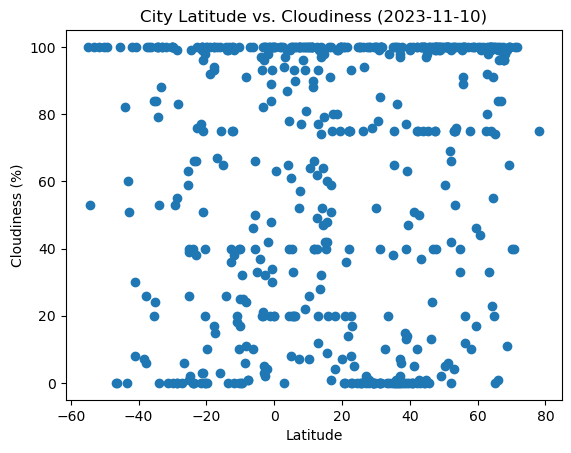

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_lat, city_clouds)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("C:/Users/Aline/anaconda3/CSV Files/WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

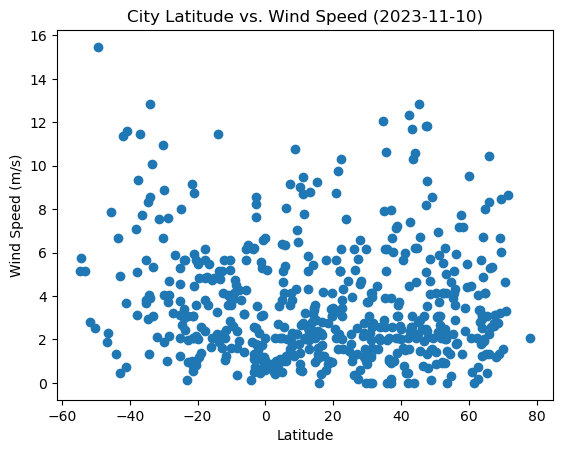

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_lat, city_wind)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("C:/Users/Aline/anaconda3/CSV Files/WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
import scipy.stats as st
def linear_regression(a,b):
    correlation = st.pearsonr(a, b)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(a, b)
    regress_values = a * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(a, b)
    plt.plot(a,regress_values,"r-")
    plt.annotate(line_eq,(a.min(),b.min()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {correlation[0]**2}")

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Egilsstadir,65.2653,-14.3948,-6.05,93,0,3.09,IS,1699669353
1,Mogocha,53.7333,119.7667,-9.64,47,76,1.48,RU,1699669353
2,Albany,42.6001,-73.9662,7.04,61,50,2.41,US,1699669353
5,Praia da Vitória,38.7333,-27.0667,21.14,88,40,7.21,PT,1699669353
6,Olonkinbyen,70.9221,-8.7187,0.94,81,100,3.31,SJ,1699669354


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Grytviken,-54.2811,-36.5092,2.00,85,53,5.77,GS,1699669353
4,Puerto Natales,-51.7236,-72.4875,4.78,96,100,2.82,CL,1699669353
9,Carazinho,-28.2839,-52.7864,22.56,86,83,4.68,BR,1699669354
12,Blackmans Bay,-43.0167,147.3167,18.18,64,60,0.45,AU,1699669355
13,Afaahiti,-17.7500,-149.2833,28.93,84,100,4.85,PF,1699669355


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7788158300289088


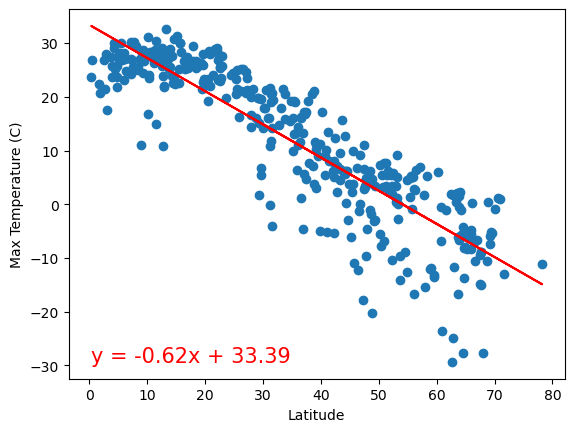

In [48]:
# Linear regression on Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Max Temp"]
linear_regression(a, b)
plt.ylabel("Max Temperature (C)")
plt.show()

The r-squared is: 0.40687469569684287


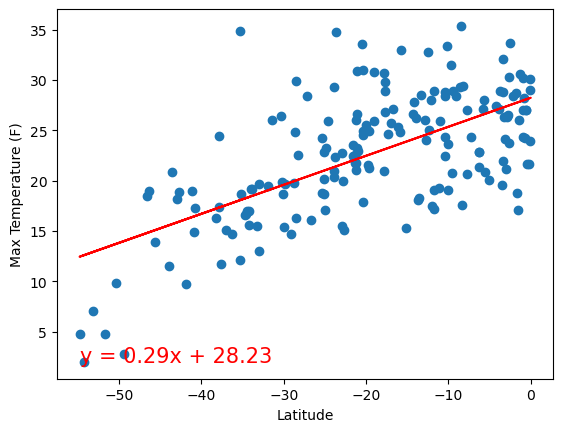

In [50]:
# Linear regression on Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Max Temp"]
linear_regression(a, b)
plt.ylabel("Max Temperature (F)")
plt.show()

**Discussion about the linear relationship:**
In the northern and southern hemispheres, the temperature is higher where the latitude is closer to 0. Latitude 0 is the equator. Areas close to equator would have higher temperatures since the sun shines more on that part of the earth due to earths spherical shape.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03306208245726189


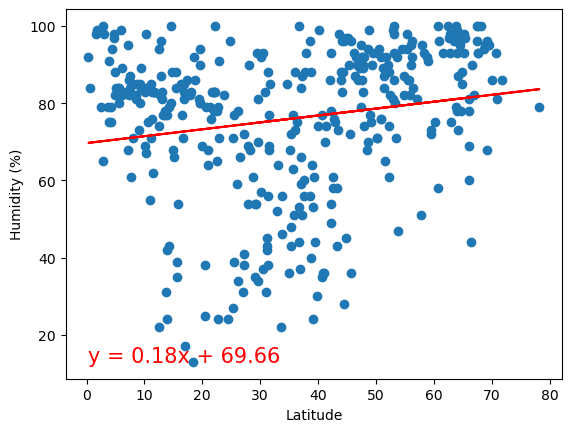

In [51]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Humidity"]
linear_regression(a, b)
plt.ylabel("Humidity (%)")
plt.show()

The r-squared is: 0.03464676478178667


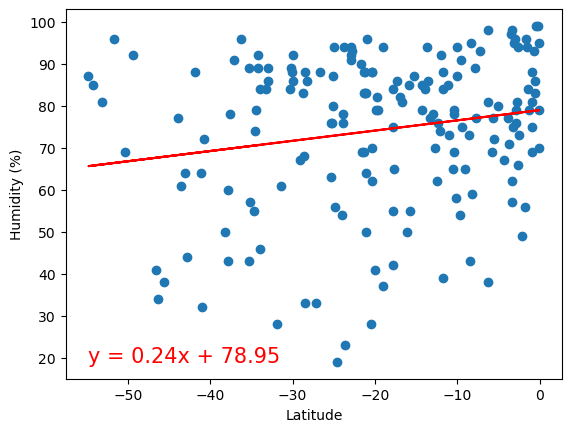

In [52]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Humidity"]
linear_regression(a, b)
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:**
The data set for the northern hemisphere is more scattered than the southern hemisphere. This can be because the northern hemisphere experiences more extreme weather in comparison to the southern hemisphere. The northern hemisphere also has more land mass from latitude 0-80, where most of the southern hemisphere's land is located near latitude -30-0. The southern hemisphere has humidity increasing towards latitude 0, which makes sense since it is the equator and would have a tropical climate.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.012702031193891399


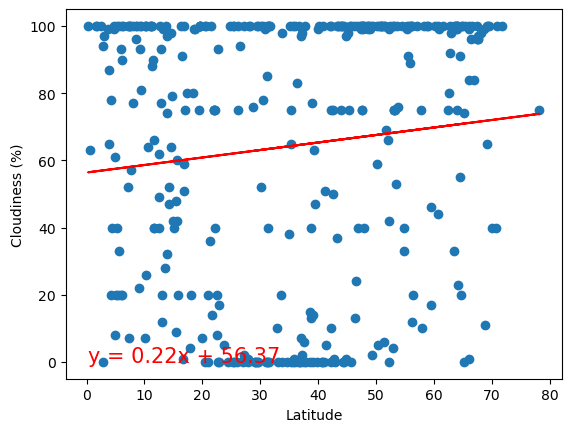

In [53]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Cloudiness"]
linear_regression(a, b)
plt.ylabel("Cloudiness (%)")
plt.show()

The r-squared is: 0.00617781832108118


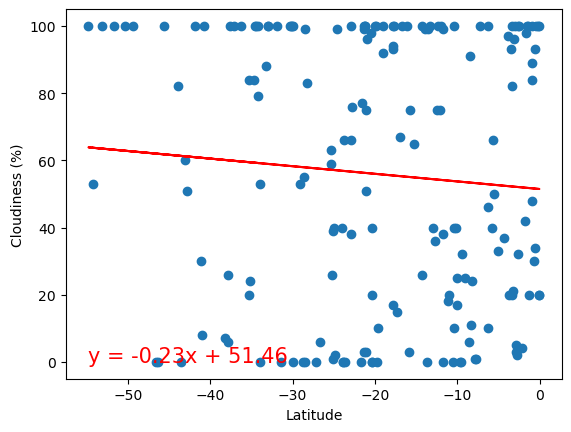

In [54]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Cloudiness"]
linear_regression(a, b)
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** 
The northern hemisphere appears to be more cloudy than the southern hemisphere. The conditions in the northern hemisphere may make more clouds than in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007353838349130249


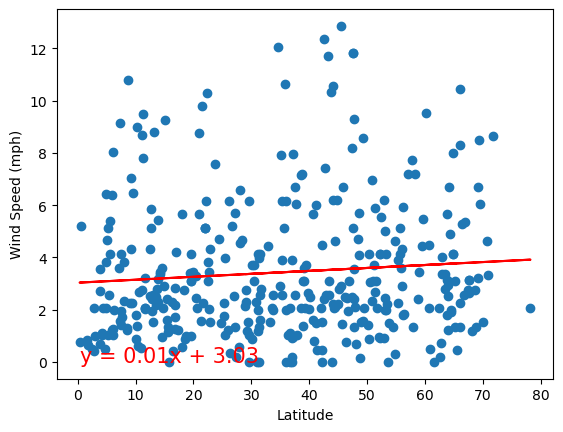

In [55]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Wind Speed"]
linear_regression(a, b)
plt.ylabel("Wind Speed (mph)")
plt.show()

The r-squared is: 0.09810089704293258


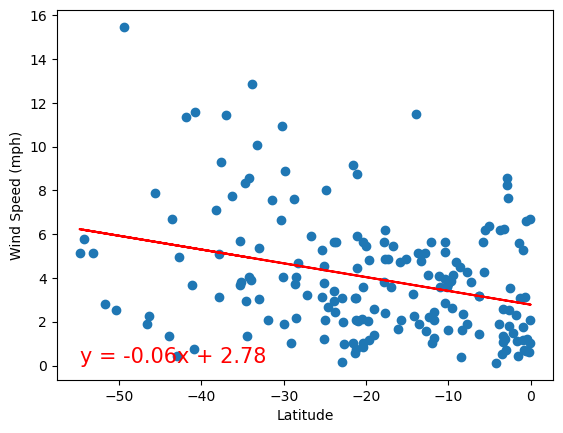

In [56]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Wind Speed"]
linear_regression(a, b)
plt.ylabel("Wind Speed (mph)")
plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, it gets slightly windier the further north the city is. In the southern hemisphere, it gets less windy towards latitude 0. That could be because that is where most of the land mass is in the southern hemisphere and the land mass could have things that contribute to wind reduction, such as trees.